# Logistic Regression as a Neural Network

We will build a logistic regression classifier to recognize cats with a Neural Network mindset.

## Packages

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
from PIL import Image
from lr_utils import load_dataset

%matplotlib inline

## Overview of Problem Set

We have a dataset ("data.h5") containing:

- a training set of m_train images labeled as cat (y=1) or non-cat (y=0)
- a test set of m_test images labeled as cat or non-cat
- each image is of shape (num_px, num_px, 3) where 3 is for the 3 channels (RGB). Thus, each image is square (height = num_px) and (width = num_px).

We will build a simple image-recognition algorithm that can correctly classify pictures as cat or non-cat.

In [135]:
#loading the data
x_train_orig, y_train, x_test_orig, y_test, classes = load_dataset()

y= 1 ,it's a cat picture


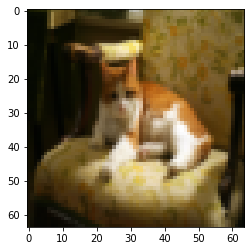

In [136]:
#checking image
index = 7
plt.imshow(x_train_orig[index])

print("y=",y_train[0,index],",it's a",classes[y_train[0,index]].decode('utf-8'),'picture')

In [137]:
x_train_orig.shape

(209, 64, 64, 3)

In [138]:
#checking vectors/matrix dimensions
m_train = x_train_orig.shape[0]
m_test = x_test_orig.shape[0]
num_px = x_train_orig.shape[1]

print("No. of training examples:",m_train)
print("No. of test examples:",m_test)
print("Dimension of image:",num_px,"*",num_px)
print("x_train shape:",x_train_orig.shape)
print("y_train shape:",y_train.shape)
print("x_test_orig shape:",x_test_orig.shape)
print("y_test.shape:",y_test.shape)

No. of training examples: 209
No. of test examples: 50
Dimension of image: 64 * 64
x_train shape: (209, 64, 64, 3)
y_train shape: (1, 209)
x_test_orig shape: (50, 64, 64, 3)
y_test.shape: (1, 50)


In [139]:
#Reshape the training and test examples
x_train = x_train_orig.reshape(x_train_orig.shape[0],-1).T
x_test = x_test_orig.reshape(x_test_orig.shape[0],-1).T

print("Before reshaping/flatten")
print("x_train shape:",x_train_orig.shape)
print("x_test shape:",x_test_orig.shape)
print("\nAfter reshaping/flatten")
print("x_train shape:",x_train.shape)
print("x_test shape:",x_test.shape)

Before reshaping/flatten
x_train shape: (209, 64, 64, 3)
x_test shape: (50, 64, 64, 3)

After reshaping/flatten
x_train shape: (12288, 209)
x_test shape: (12288, 50)


In [140]:
#standardize our dataset
x_train = x_train/255.
x_test = x_test/255

## General Architecture of learning algorithm

We will build a Logistic Regression, using a Neural Network mindset. The following Figure explains why Logistic Regression is actually a very simple Neural Network!

<img src="images/LogReg_kiank.png" style="width:650px;height:400px;">

## Building the parts of our algorithm

The main steps for building a Neural Network are:

1. Define the model structure (such as number of input features)
2. Initialize the model's parameters
3. Loop:
   - Calculate current loss (forward propagation)
   - Calculate current gradient (backward propagation)
   - Update parameters (gradient descent)

We build 1-3 separately and integrate them into one function call model().

In [141]:
#helper function
def sigmoid(z):
    s = 1/(1+np.exp(-z))
    return s

In [142]:
sigmoid(np.array([0,2]))

array([0.5       , 0.88079708])

### 1. Initializing parameters

In [143]:
def initialize_parameters(dim):
    w = np.zeros((dim,1))
    b=0
    
    return w,b

In [144]:
dim=2
w,b = initialize_parameters(dim)
print("w --> ",w,"\nb -->",b)

w -->  [[0.]
 [0.]] 
b --> 0


### 2. Forward and Backward propagation

Now that our parameters are initialized, we can do the "forward" and "backward" propagation steps for learning the parameters.

In [145]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    #Forward Prop
    A = sigmoid(np.dot(w.T,X)+b)
    cost = (-1/m)*(np.sum(Y*np.log(A)+(1-Y)*np.log(1-A)))
    
    #Backward Prop
    dw = (1/m)*(np.dot(X,(A-Y).T))
    db = (1/m)*(np.sum(A-Y))
    
    grads = {'dw':dw,
            'db':db}
    
    return grads, cost

In [146]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print("dw:",grads['dw'])
print("db:",grads['db'])
print("cost:",cost)

dw: [[0.99845601]
 [2.39507239]]
db: 0.001455578136784208
cost: 5.801545319394553


### 3. Optimization

Now, we want to update the parameters using gradient descent.

In [147]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    
    costs = []
    
    for i in range(num_iterations):
        
        grads, cost = propagate(w, b, X, Y)
        
        #retrieve derivatives from back prop
        dw = grads['dw']
        db = grads['db']
        
        #update rule
        w = w - learning_rate*dw
        b = b - learning_rate*db
        
        #record the costs
        if i % 100 == 0:
            costs.append(cost)

        #Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        
    params = {'w':w,
              'b':b}
    
    grads = {'dw':dw,
             'db':db}
    
    return params, grads, costs

In [148]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = 1.9253598300845747
dw = [[0.67752042]
 [1.41625495]]
db = 0.21919450454067657


### 4. Prediction

In [149]:
def predict(w, b, X):
    
    m = X.shape[1]
    y_predict = np.zeros((1,m))
    w = w.reshape(X.shape[0],1)
    
    A = sigmoid(np.dot(w.T, X)+b)
    
    for i in range(A.shape[1]):
        y_predict[0,i] = 1 if A[0,i] > 0.5 else 0
        
    return y_predict

In [150]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


## Merge all functions into a model

In [151]:
def model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate=0.5, print_cost=False):
    
    #initialize parameters
    w, b = initialize_parameters(x_train.shape[0])
    
    #gradient descent
    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)
    
    #retrieve parameters
    w = parameters['w']
    b = parameters['b']
    
    #prediction
    y_predict_train = predict(w, b, x_train)
    y_predict_test = predict(w, b, x_test)
    
    #print train/test errors
    print("Train accuracy : ", 100 - np.mean(np.abs(y_predict_train - y_train))*100)
    print("Test accuracy : ", 100 - np.mean(np.abs(y_predict_test - y_test))*100)
    
    d =  {"costs": costs,
         "y_predict_test": y_predict_test, 
         "y_predict_train" : y_predict_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    
    return d
    

In [152]:
d = model(x_train, y_train, x_test, y_test, num_iterations = 2000, learning_rate = 0.005, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.584508
Cost after iteration 200: 0.466949
Cost after iteration 300: 0.376007
Cost after iteration 400: 0.331463
Cost after iteration 500: 0.303273
Cost after iteration 600: 0.279880
Cost after iteration 700: 0.260042
Cost after iteration 800: 0.242941
Cost after iteration 900: 0.228004
Cost after iteration 1000: 0.214820
Cost after iteration 1100: 0.203078
Cost after iteration 1200: 0.192544
Cost after iteration 1300: 0.183033
Cost after iteration 1400: 0.174399
Cost after iteration 1500: 0.166521
Cost after iteration 1600: 0.159305
Cost after iteration 1700: 0.152667
Cost after iteration 1800: 0.146542
Cost after iteration 1900: 0.140872
Train accuracy :  99.04306220095694
Test accuracy :  70.0


Training accuracy is close to 100%. This is a good sanity check: our model is working and has high enough capacity to fit the training data. Test accuracy is 70%. It is actually not bad for this simple model, given the small dataset we used and that logistic regression is a linear classifier.

Now lets check the predictions on pictures of test set

y= 0 , we predicted that it is a cat picture


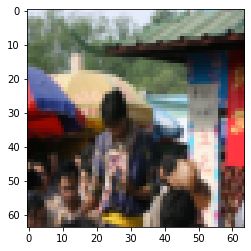

In [153]:
index = 34
plt.imshow(x_test[:,index].reshape((num_px,num_px,3)))
print("y=",y_test[0,index],", we predicted that it is a",classes[int(d['y_predict_test'][0,index])].decode('utf-8'),'picture')

y= 1 , we predicted that it is a cat picture


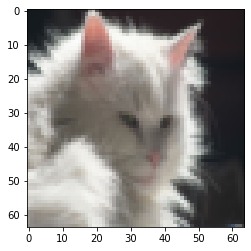

In [154]:
index = 8
plt.imshow(x_test[:,index].reshape((num_px,num_px,3)))
print("y=",y_test[0,index],", we predicted that it is a",classes[int(d['y_predict_test'][0,index])].decode('utf-8'),'picture')

Let's also plot the cost function and gradient

### Plot the learning curve

Text(0.5, 1.0, 'Learning rate = 0.005')

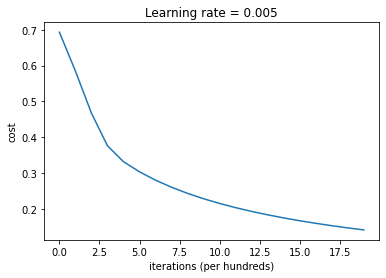

In [155]:
plt.plot(d['costs'])
plt.xlabel('iterations (per hundreds)')
plt.ylabel('cost')
plt.title("Learning rate = " + str(d["learning_rate"]))

### Further analysis

#### Choice of learning rate

Let's compare the learning curve of our model with several choices of learning rates.

In [156]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}

for i in learning_rates:
    print('learning_rate:', str(i))
    models[str(i)] = model(x_train, y_train, x_test, y_test, num_iterations = 1500, learning_rate = i, print_cost = False)
    print('---------------')

learning_rate: 0.01
Train accuracy :  99.52153110047847
Test accuracy :  68.0
---------------
learning_rate: 0.001
Train accuracy :  88.99521531100478
Test accuracy :  64.0
---------------
learning_rate: 0.0001
Train accuracy :  68.42105263157895
Test accuracy :  36.0
---------------


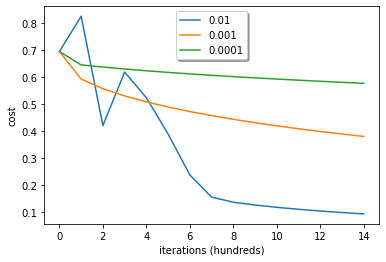

In [157]:
for i in learning_rates:
    plt.plot(models[str(i)]['costs'], label = str(models[str(i)]['learning_rate']))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')
legend = plt.legend(loc='upper center', shadow=True)